In [32]:
import tensorflow as tf
import keras 

In [33]:
print("tensofflow version",tf.__version__)
print("Keras version",keras.__version__)

tensofflow version 2.20.0
Keras version 3.12.0


In [34]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D
from keras.layers import Dense,Flatten
from keras.layers import Dropout

In [35]:
## Load the MNIST Data
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [36]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [37]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [38]:
#Image Shape
num_image,image_rows,image_col =X_train.shape

In [39]:
image_rows ,image_col

(28, 28)

In [40]:
import pandas as pd
import numpy as np

In [41]:
pd.Series(y_train).nunique()

10

In [42]:
#Batchsize,number of classes,epoch
batch_size = 32
epoch = 3
num_classes = pd.Series(y_train).nunique()

In [43]:
import matplotlib.pyplot as plt

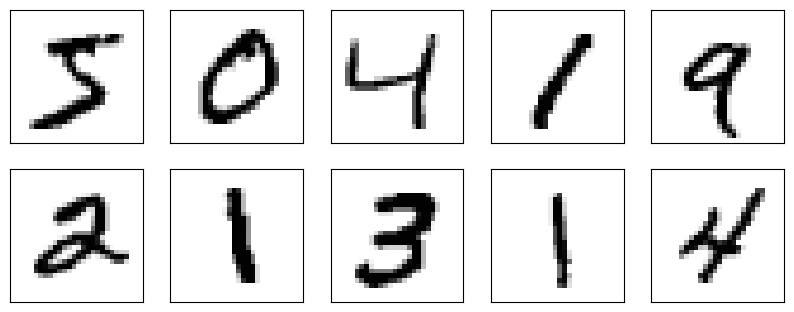

In [44]:
#plot first 10 images
plt.figure(figsize =(10,10))

#create grid of 10 images
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i,:,:],cmap=plt.cm.binary)

In [45]:
#Datatype of input
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [46]:
#Normakize the pixel values
X_train = X_train/255
X_test = X_test/255

In [47]:
np.expand_dims(X_train,axis = 3).shape

(60000, 28, 28, 1)

In [48]:
X_train = np.expand_dims(X_train,axis = 3)
X_test = np.expand_dims(X_test,axis=3)

In [49]:
X_train.shape,X_test.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

## Model

In [50]:
model = Sequential()
from keras.layers import Input

In [51]:
# add convolution layers to the model

# input layer
model.add(Input(shape=(image_rows,image_col,1)))

# convolution layer
model.add(Conv2D(16, kernel_size=(3,3), padding="valid", activation="relu"))
# max pool layer
model.add(MaxPool2D(pool_size=(2,2)))


In [52]:
#Flattern the output
model.add(Flatten())
#Fc layer
#hidden layer
model.add(Dense(units=32,activation="relu"))
#Drop out layer
model.add(Dropout(rate=0.4))
#Output layer
model.add(Dense(units=num_classes,activation="softmax"))

In [53]:
#model.summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        86,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,050 (340.04 KB)

 Trainable params: 87,050 (340.04 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
#complie our model
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [59]:
epoch =3

In [60]:
#Fit the model on training data
model.fit(X_train,y_train,
          batch_size=batch_size,
          epochs=epoch,
          verbose=1,
          validation_data=(X_test,y_test))

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9261 - loss: 0.2357 - val_accuracy: 0.9745 - val_loss: 0.0811
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9414 - loss: 0.1901 - val_accuracy: 0.9800 - val_loss: 0.0682
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9503 - loss: 0.1581 - val_accuracy: 0.9796 - val_loss: 0.0651


In [61]:
#evaluate the model on the test data
model.evaluate(X_test,y_test,return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9796 - loss: 0.0651


{'accuracy': 0.9796000123023987, 'loss': 0.0651264563202858}

## SHAP

In [63]:
import shap

In [64]:
#Create the background data for 100 samples
background_data = X_train[(np.random.choice(X_train.shape[0],100,replace=False))]
background_data.shape

(100, 28, 28, 1)

In [65]:
#Explainer
explainer = shap.DeepExplainer(model=model,
                               data=background_data)

c:\DS_Material\CSU\CV\SHAP-PRJ\.venv\Lib\site-packages\shap\explainers\_deep\deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
c:\DS_Material\CSU\CV\SHAP-PRJ\.venv\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_3
Received: inputs=['Tensor(shape=(100, 28, 28, 1))']
  warnings.warn(msg)


In [68]:
#Calculate the shap values
test_data = X_test[0:10]

In [69]:
test_data.shape

(10, 28, 28, 1)

In [70]:
shap_values = explainer(test_data)

c:\DS_Material\CSU\CV\SHAP-PRJ\.venv\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_3
Received: inputs=['Tensor(shape=(200, 28, 28, 1))']
  warnings.warn(msg)
c:\DS_Material\CSU\CV\SHAP-PRJ\.venv\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_3
Received: inputs=['Tensor(shape=(10, 28, 28, 1))']
  warnings.warn(msg)


In [71]:
shap_values.values.shape

(10, 28, 28, 1, 10)

### shap_values = [numpy.array]
List of arrays of SHAP values. Each array has the shape (# samples x width x height x channels), and the length of the list is equal to the number of model outputs that are being explained.

pixel_values = numpy.array
Matrix of pixel values (# samples x width x height x channels) for each image. It should be the same shape as each array in the shap_values list of arrays.

In [85]:
# shap values list
shap_value_list = []
for i in range(10):
    shap_value_list.append(shap_values.values[:,:,:,:,i])
    

In [86]:
len(shap_value_list)

10

In [87]:
shap_value_list[0].shape

(10, 28, 28, 1)

In [80]:
shap_values.values[:,:,:,:,0].shape

(10, 28, 28, 1)

## Plots

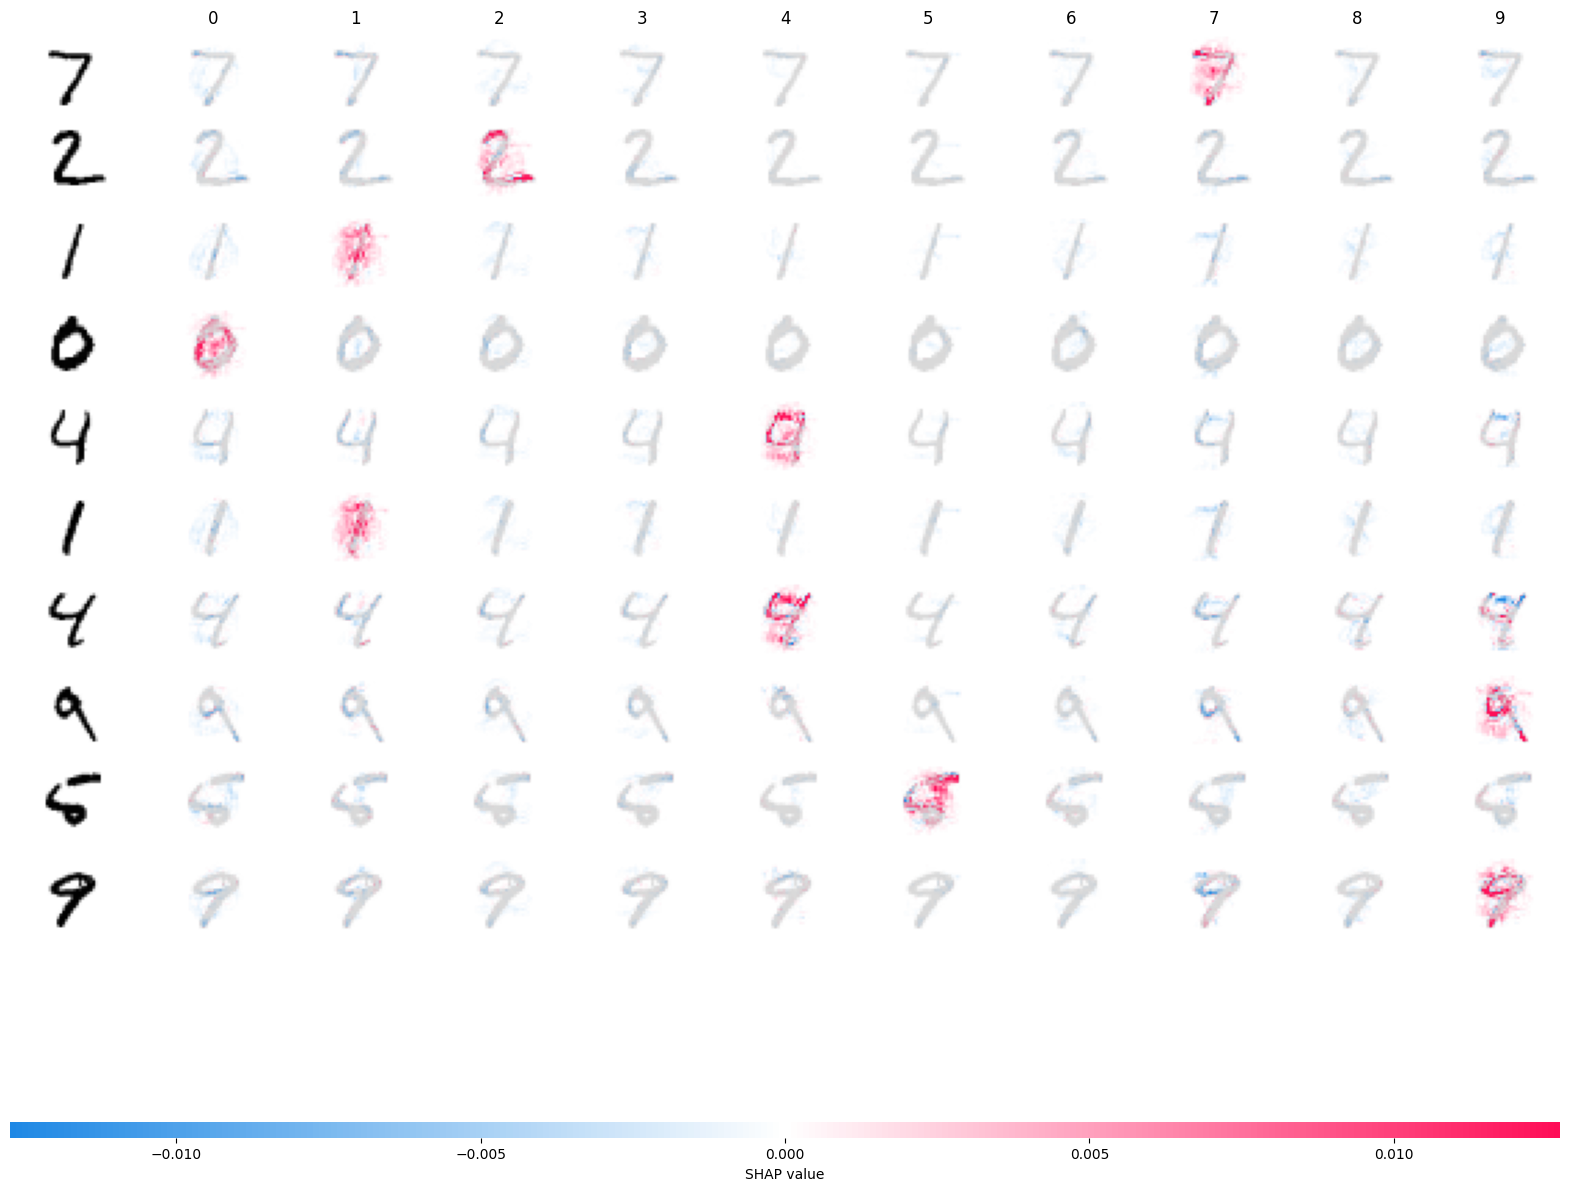

In [88]:
shap.plots.image(shap_value_list,-test_data,labels=list(range(10)))